In [3]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(x_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(x_val, y_val))

Train on 1000 samples, validate on 100 samples
Epoch 1/5
1000/1000 [==============================] - 3s 3ms/step - loss: 11.5407 - acc: 0.0980 - val_loss: 11.7218 - val_acc: 0.1000
Epoch 2/5
1000/1000 [==============================] - 0s 279us/step - loss: 11.5391 - acc: 0.0900 - val_loss: 11.7237 - val_acc: 0.0800
Epoch 3/5
1000/1000 [==============================] - 0s 347us/step - loss: 11.5381 - acc: 0.1080 - val_loss: 11.7221 - val_acc: 0.1400
Epoch 4/5
1000/1000 [==============================] - 0s 317us/step - loss: 11.5381 - acc: 0.0930 - val_loss: 11.7236 - val_acc: 0.0700
Epoch 5/5
1000/1000 [==============================] - 0s 282us/step - loss: 11.5378 - acc: 0.0920 - val_loss: 11.7239 - val_acc: 0.0800


In [7]:
print(np.shape(x_train))

(1000, 8, 16)


In [6]:
print(y_train[3])

[0.47617616 0.29772802 0.98472507 0.19476422 0.05812085 0.35572677
 0.45608004 0.99205198 0.18890255 0.95935109]


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io.wavfile
from numpy import array
import os

path1="Allsongs/"
e1=[]
arr1=[]
app1=np.zeros([100000, 1011])
i1=0
c=0
for filename in os.listdir(path1):
    emo1=int(filename[7])
    try:
        rate1, data1 = scipy.io.wavfile.read("Allsongs/"+filename)
    except:
        #print("yeah")
        i1=i1
    
    if data1.shape==(len(data1),):
        c=c+1
        
        if len(data1) < 100000:
            l=len(data1)
            l=100000-l
            for k in range(0,l):
                data1=np.append(data1,0)

        elif len(data1)<150000 and len(data1)>=100000:
            l=len(data1)
            s=l-100000
            data1=data1[s:]
        else:
            data1 = data1[50000:150000]
        for j in range(0,100000):
            app1[j][i1]=data1[j]
        
        arr1.append(data1)
        e1.append(emo1)    
    else:
        print(filename)
    i1=i1+1
    
#print(app1.shape)
#a1=array(arr1)
#print(a1.dtype)
#print(a1.shape)

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [2]:
print(i1)
print(app1.shape)
print(c)
arr1=array(arr1)
print(arr1.shape)

1011
(100000, 1011)
1011
(1011, 100000)


In [3]:
capp=app1
capp=np.transpose(capp)
print(capp.shape)
e1=array(e1)
print(e1.shape)

import sklearn
from keras.utils import to_categorical
labels = []
for i in range(0,1011):
    lab=to_categorical(e1[i], 7)
    lab=lab[1:]
    labels.append(lab)
    
capp = capp.reshape(1011, 10, 10000)
print(capp.shape)
labels=array(labels)
print(labels.shape)

from random import shuffle
ind_list = [i for i in range(1011)]
shuffle(ind_list)
train_new  = capp[ind_list,:,:]
target_new = labels[ind_list,]

(1011, 100000)
(1011,)


Using TensorFlow backend.


(1011, 10, 10000)
(1011, 6)


In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

modelser1 = Sequential()

#LSTM Layer1
modelser1.add(LSTM(256, return_sequences=True, input_shape=(10, 10000)))     # returns a sequence of vectors of dimension 256

#LSTM Layer2
modelser1.add(LSTM(128, return_sequences=True))                             # returns a sequence of vectors of dimension 128

#LSTM Layer3
modelser1.add(LSTM(64))                                                    # return a single vector of dimension 64

#hidden layer
modelser1.add(Dense(32, activation='relu'))

#Output layer
modelser1.add(Dense(6, activation='softmax'))

modelser1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist1 = modelser1.fit(train_new, target_new, batch_size=64, epochs=20, verbose=1, validation_split=0.05 )

Train on 960 samples, validate on 51 samples
Epoch 1/20
960/960 [==============================] - 123s 128ms/step - loss: 1.7701 - acc: 0.2354 - val_loss: 1.7897 - val_acc: 0.3137
Epoch 2/20
960/960 [==============================] - 20s 21ms/step - loss: 1.6811 - acc: 0.3135 - val_loss: 1.7535 - val_acc: 0.3922
Epoch 3/20
960/960 [==============================] - 18s 19ms/step - loss: 1.5094 - acc: 0.3885 - val_loss: 1.7222 - val_acc: 0.2745
Epoch 4/20
960/960 [==============================] - 18s 19ms/step - loss: 1.2857 - acc: 0.5687 - val_loss: 1.7066 - val_acc: 0.3529
Epoch 5/20
960/960 [==============================] - 19s 20ms/step - loss: 1.1319 - acc: 0.6188 - val_loss: 1.4574 - val_acc: 0.5686
Epoch 6/20
960/960 [==============================] - 18s 19ms/step - loss: 0.9672 - acc: 0.6865 - val_loss: 1.5803 - val_acc: 0.5882
Epoch 7/20
960/960 [==============================] - 18s 19ms/step - loss: 0.8274 - acc: 0.7146 - val_loss: 1.4147 - val_acc: 0.5686
Epoch 8/20
960/

In [15]:
# serialize model to JSON
modelser1_json = modelser1.to_json()
with open("modelser1.json", "w") as json_file:
    json_file.write(modelser1_json)
# serialize weights to HDF5
modelser1.save_weights("modelser1.h5")
print("Saved model to disk")



Saved model to disk


In [16]:
from keras.models import model_from_json
# load json and create model
json_file = open('modelser1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("modelser1.h5")
print("Loaded model from disk")

Loaded model from disk


In [17]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io.wavfile
rate, data = scipy.io.wavfile.read("RECORDING (2).wav")
print (rate)
print(len(data))
print(data[0])
new=[]
for b in data:
    b=max(b[0],b[1])
    new.append(b)
print(len(new))    



44100
274432
[-4312 -9714]
274432


In [18]:
l=len(new)
c=int(l/100000)
print(c)
rec=[]
i=0
for i in range(0,c):
    rec.append(new[100000*i:100000*(i+1)])
rec=np.array(rec)    
print(rec.shape)
#rec=rec.reshape(c,10,10000)
for i in range(0,c):
    find=rec[i]
    find=find.reshape(1,10,10000)
    custom = loaded_model.predict(find)
    percent_emot = custom[0]
    output_emot = custom[0].tolist()
    disp_output = "\n\nProbability assigned to each emotion class as percentage:" + "\n\nNeutral: "+ str(output_emot[0]*100)+ "\n\nCalm: "+ str(output_emot[1]*100)+ "\n\nHappy: "+ str(output_emot[2]*100)+ "\n\nSad: "+ str(output_emot[3]*100) + "\n\nAngry: "+ str(output_emot[4]*100) + "\n\nFearful: "+ str(output_emot[5]*100) 
    print(disp_output)

2
(2, 100000)


Probability assigned to each emotion class as percentage:

Neutral: 0.42259087786078453

Calm: 0.6180996540933847

Happy: 14.7580087184906

Sad: 0.7286047097295523

Angry: 78.35177779197693

Fearful: 5.120917782187462


Probability assigned to each emotion class as percentage:

Neutral: 0.0015299354345188476

Calm: 0.038830822450108826

Happy: 99.65859651565552

Sad: 0.055701995734125376

Angry: 0.18015506211668253

Fearful: 0.06518710288219154


In [9]:
#X_test = train_new()
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras
loaded_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
loaded_model.fit(train_new,target_new)
y_pred =loaded_model.predict(train_new)

Epoch 1/1
1011/1011 [==============================] - 127s 125ms/step - loss: 0.2112 - acc: 0.9387


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
pred_list = []; actual_list = []
predictions = loaded_model.predict(train_new)
for i in predictions:
    pred_list.append(np.argmax(i))
for i in target_new:
    actual_list.append(np.argmax(i))
cnf_matrix=confusion_matrix(actual_list, pred_list)

In [11]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names =['angry','disgust','fear','happy','neutral','surprise','sad']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



Confusion matrix, without normalization
[[ 84   0   0   2   2   3]
 [  0 178   2   2   0   2]
 [  0   8 167   2   3   4]
 [  1   5   3 165   5   5]
 [  2   4   4  10 160   4]
 [  0   6   1   1   3 173]]


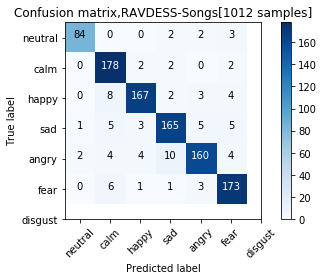

In [13]:
class_names =['neutral','calm','happy','sad','angry','fear','disgust']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix,RAVDESS-Songs[1012 samples]')
plt.show()

In [19]:
print(hist1.history.keys())


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


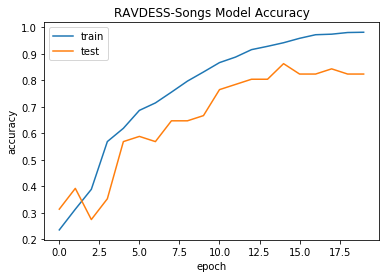

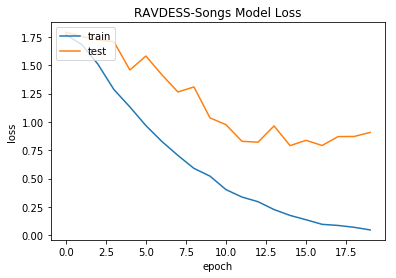

In [24]:
# summarize history for accuracy
plt.plot(hist1.history['acc'])
plt.plot(hist1.history['val_acc'])
plt.title('RAVDESS-Songs Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('RAVDESS-Songs Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io.wavfile
from numpy import array
import os

path1="Allsongs/"
e1=[]
arr1=[]
app1=np.zeros([100000, 1011])
i1=0
c=0
for filename in os.listdir(path1):
    emo1=int(filename[7])
    try:
        rate1, data1 = scipy.io.wavfile.read("Allsongs/"+filename)
    except:
        #print("yeah")
        i1=i1
    
    if data1.shape==(len(data1),):
        c=c+1
        
        if len(data1) < 100000:
            l=len(data1)
            l=100000-l
            for k in range(0,l):
                data1=np.append(data1,0)

        elif len(data1)<150000 and len(data1)>=100000:
            l=len(data1)
            s=l-100000
            data1=data1[s:]
        else:
            data1 = data1[50000:150000]
        for j in range(0,100000):
            app1[j][i1]=data1[j]
        
        arr1.append(data1)
        e1.append(emo1)    
    else:
        print(filename)
    i1=i1+1
    
print(app1.shape)
a1=array(arr1)
#print(a1.dtype)
print(a1.shape)

In [ ]:
capp=app1
capp=np.transpose(capp)
print(capp.shape)
e1=array(e1)
print(e1.shape)

import sklearn
from keras.utils import to_categorical
labels = []
for i in range(0,1011):
    lab=to_categorical(e1[i], 8)
    lab=lab[1:]
    labels.append(lab)
    
capp = capp.reshape(1011, 10, 10000)
print(capp.shape)
labels=array(labels)
print(labels.shape)

from random import shuffle
ind_list = [i for i in range(1011)]
shuffle(ind_list)
train_new  = capp[ind_list,:,:]
target_new = labels[ind_list,]

In [ ]:
capp=app1
capp=np.transpose(capp)
print(capp.shape)
e1=array(e1)
print(e1.shape)

import sklearn
from keras.utils import to_categorical
labels = []
for i in range(0,1011):
    lab=to_categorical(e1[i], 8)
    lab=lab[1:]
    labels.append(lab)
    
capp = capp.reshape(1011, 10, 10000)
print(capp.shape)
labels=array(labels)
print(labels.shape)

from random import shuffle
ind_list = [i for i in range(1011)]
shuffle(ind_list)
train_new  = capp[ind_list,:,:]
target_new = labels[ind_list,]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

modelser1 = Sequential()

#LSTM Layer1
modelser1.add(LSTM(256, return_sequences=True, input_shape=(10, 10000)))     # returns a sequence of vectors of dimension 256

#LSTM Layer2
modelser1.add(LSTM(128, return_sequences=True))                             # returns a sequence of vectors of dimension 128

#LSTM Layer3
modelser1.add(LSTM(64))                                                    # return a single vector of dimension 64

#hidden layer
modelser1.add(Dense(32, activation='relu'))

#Output layer
modelser1.add(Dense(7, activation='softmax'))

modelser1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

modelser1.fit(train_new, target_new, batch_size=64, epochs=40, verbose=1, validation_split=0.05 )

In [ ]:
# serialize model to JSON
modelser1_json = modelser1.to_json()
with open("modelser1.json", "w") as json_file:
    json_file.write(modelser1_json)
# serialize weights to HDF5
modelser1.save_weights("modelser1.h5")
print("Saved model to disk")

from keras.models import model_from_json
# load json and create model
json_file = open('modelser1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("modelser1.h5")
print("Loaded model from disk")

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io.wavfile
rate, data = scipy.io.wavfile.read("RECORDING.wav")
print (rate)
print(len(data))
print(data[0])
new=[]
for b in data:
    b=max(b[0],b[1])
    new.append(b)
print(len(new))    



In [ ]:
l=len(new)
c=int(l/100000)
print(c)
rec=[]
i=0
for i in range(0,c):
    rec.append(new[100000*i:100000*(i+1)])
rec=np.array(rec)    
print(rec.shape)
#rec=rec.reshape(c,10,10000)
for i in range(0,c):
    find=rec[i]
    find=find.reshape(1,10,10000)
    custom = loaded_model.predict(find)
    percent_emot = custom[0]
    output_emot = custom[0].tolist()
    disp_output = "Probability assigned to each emotion class as percentage:" + "\n\nNeutral: "+ str(output_emot[0]*100)+ "\n\nCalm: "+ str(output_emot[1]*100)+ "\n\nHappy: "+ str(output_emot[2]*100)+ "\n\nSad: "+ str(output_emot[3]*100) + "\n\nAngry: "+ str(output_emot[4]*100) + "\n\nFearful: "+ str(output_emot[5]*100) + "\n\nDisgust: " +str(output_emot[6]*100 ) 
    print(disp_output)